<a href="https://colab.research.google.com/github/hrutkabence/tutorials/blob/master/english/machine_learning/lessons/SAM_img_segmentation_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation with SAM

## 1.) Who is SAM?

The [Segment Anything Model (SAM)](https://segment-anything.com) is a deep learning model developed by MetaAI, designed to segment and distinguish various types of objects in a given image or images.
The model was trained on a dataset consisting of [11 million images and 1.1 billion masks](https://segment-anything.com/dataset/index.html).


![](https://github.com/facebookresearch/segment-anything/raw/main/assets/model_diagram.png?raw=true)


## 2.) Setting up the Google Colab environment

### Steps required to apply it in a Google Colab environment:
- Set the runtime to use a GPU!
- Download or clone the  [SAM GitHub](https://github.com/facebookresearch/segment-anything.git) repository.
- Create a new folder on the virtual machine (/content/segment-anything), then install it.
- Download a pre-trained model (e.g., sam_vit_h_4b8939.pth)
- Install the [supervision](https://github.com/roboflow/supervision) module.

### What does this look like in practice?


In [1]:
!git clone -q 'https://github.com/facebookresearch/segment-anything.git'
!pip install -q supervision
!pip install -q onnxruntime onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00


Let's download the model (~2.5GB!)
with the help of following link.
https://github.com/facebookresearch/segment-anything#model-checkpoints

In [2]:
%cd segment-anything
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content/segment-anything


## 3.) Applying the pre-trained model

### a.) Segmenting land parcels from satellite imagery

As a first step, we initialize the model. For processing, we will use the graphics card (GPU) of our virtual machine.

In [3]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

# Load the downloaded model
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
CHECKPOINT_PATH = "./sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

# Initialize the SAM mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

Let’s download a photo and specify the path to the downloaded image!

In [4]:
!wget -q -O sample_image_sat.png https://github.com/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/data/sample_image_sat.png?raw=true
image_path = 'sample_image_sat.png'

Let's display the original photo.

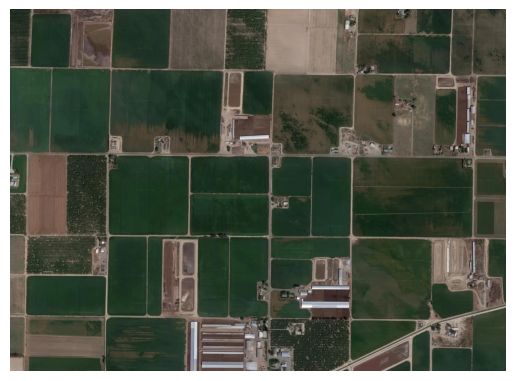

In [5]:
import cv2                        # Image processing
import supervision as sv          # Draw masks
import matplotlib.pyplot as plt   # Visualization

# Let's read the photo using OpenCV, then convert the loaded BGR color order to RGB.
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Let's visualize the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Let's apply SAM to the image!

In [6]:
# Generating masks with SAM
sam_result = mask_generator.generate(image_rgb)

Let's use the supervision module to display the masks.

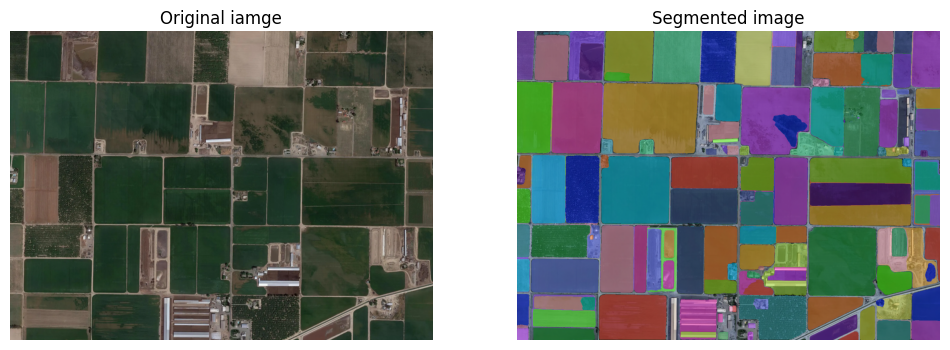

In [7]:
# Initialize MaskAnnotator
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Converting the result of SAM for supervision
detections = sv.Detections.from_sam(sam_result=sam_result)

# Displaying the segments by different colors
annotated_image = mask_annotator.annotate(scene=image_rgb.copy(), detections=detections)

# Display
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['Original iamge', 'Segmented image']
)

### b.) Segmentation of an orthophoto

Let’s download an orthophoto or any photo of your choice and use the previous code!

In [8]:
!wget -q !wget -q -O BME_K_building.tiff https://github.com/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/data/BME_K_building.tiff?raw=true
image_orto = './BME_K_building.tiff'

For easier usability, let’s create a function:



In [11]:
def sam(image_path, mask_generator):
  image_bgr = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  sam_result = mask_generator.generate(image_rgb)
  mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Converting the result of SAM for supervision
  detections = sv.Detections.from_sam(sam_result=sam_result)

# Displaying the segments by different colors
  annotated_image = mask_annotator.annotate(scene=image_rgb.copy(), detections=detections)

# Display
  sv.plot_images_grid(
      images=[image_bgr, annotated_image],
      grid_size=(1, 2),
      titles=['Original image', 'Segmented image']
  )


Let's use the function!

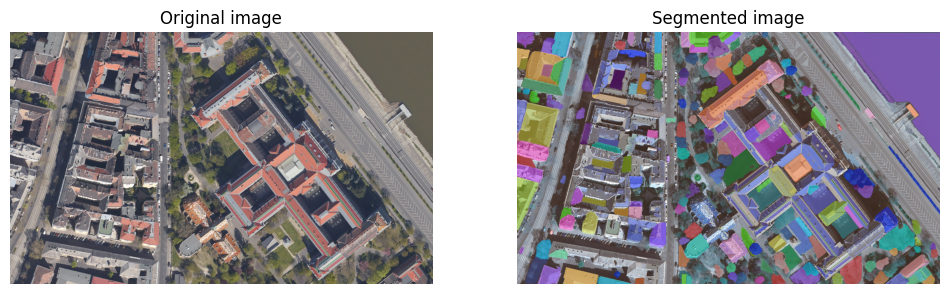

In [12]:
sam(image_orto, mask_generator)

### Adational tasks

Export the segments!

## References

- https://medium.com/stackademic/high-resolution-or-low-resolution-image-does-it-matter-for-the-segment-anything-model-sam-9eeb229ad9c0


- https://medium.com/@mahyar.aboutalebi/which-version-of-the-segment-anything-model-sam-can-detect-more-objects-python-2bc7d3d80234


- https://github.com/facebookresearch/segment-anything#model-checkpoints
